<a href="https://colab.research.google.com/github/akutayaydin/Magnimind-5.1-DeepLearning/blob/main/7_GenderIDTransfLearn_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `list_attr_celeba` Dataset
A popular component of computer vision and deep learning revolves around identifying faces for various applications from logging into your phone with your face or searching through surveillance images for a particular suspect. This dataset is great for training and testing models for face detection, particularly for recognising facial attributes such as finding people with brown hair, are smiling, or wearing glasses. Images cover large pose variations, background clutter, diverse people, supported by a large quantity of images and rich annotations. This data was originally collected by researchers at MMLAB, The Chinese University of Hong Kong (specific reference in Acknowledgment section).



- 202,599 number of face images of various celebrities
- 10,177 unique identities, but names of identities are not given
- 40 binary attribute annotations per image

You can obtain the dataset from https://www.kaggle.com/jessicali9530/celeba-dataset

In [ ]:
#Identify Gender of the Picture

In [ ]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import keras
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras.utils as image
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
mypath='/content/gdrive/My Drive/Google Colab Folder/celeb_small'
print(os.listdir(mypath))

['list_attr_celeba.csv', '.ipynb_checkpoints', 'list_attr_celeba 2.csv', 'train', 'test', 'validation']


In [ ]:
mypath_traindata = '/content/gdrive/My Drive/Google Colab Folder/celeb_small/train'
mypath_validationdata = '/content/gdrive/My Drive/Google Colab Folder/celeb_small/validation'
mypath_testdata = '/content/gdrive/My Drive/Google Colab Folder/celeb_small/test'

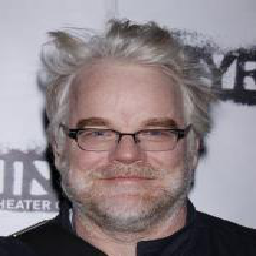

In [ ]:
#img = image.load_img('/content/gdrive/My Drive/Google Colab Folder/celeb_small/train/man/man004823.jpg')
new_image = image.load_img('/content/gdrive/My Drive/Google Colab Folder/celeb_small/train/man/man004823.jpg', target_size = (256, 256))
new_image

In [ ]:
#Initiate the model

vgg_model = keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 18s 0us/step


In [ ]:
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#Remove the last layer
#Remove the last layer of predictions from the model.
last_layer = str(vgg_model.layers[-1])


In [ ]:
last_layer

'<keras.layers.core.dense.Dense object at 0x7f85394e9b10>'

In [ ]:
model = keras.Sequential()

In [ ]:
for layer in vgg_model.layers:
  if str(layer) != last_layer:
    model.add(layer)

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


ValueError: ignored

In [ ]:
|model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
for name in os.listdir(mypath_traindata):
  dir = os.path.join(mypath_traindata,name)
  if os.path.isdir(dir):
    if name != '.ipynb_checkpoints':
      print('Directory name:' + str(dir))
      for fname in os.listdir(dir):
        try:
          #img = Image.open(str(dir) + '/' + str(fname))
          new_image = image.load_img(str(dir) + '/' + str(fname), target_size = (256, 256))
          new_image.verify()
          count_train +=1
        except:
          print('Corrupted image: ' + str(fname))

Directory name:/content/gdrive/My Drive/Google Colab Folder/celeb_small/train/female
Corrupted image: female000198.jpg
Corrupted image: female025080.jpg
Corrupted image: female021698.jpg
Corrupted image: female001202.jpg
Corrupted image: female005814.jpg
Corrupted image: female018184.jpg
Corrupted image: female001695.jpg
Corrupted image: female010361.jpg
Corrupted image: female001947.jpg
Corrupted image: female004942.jpg
Corrupted image: female024381.jpg
Corrupted image: female002017.jpg
Corrupted image: female010813.jpg
Corrupted image: female017618.jpg
Corrupted image: female001360.jpg
Corrupted image: female026413.jpg
Corrupted image: female025041.jpg
Corrupted image: female020350.jpg
Corrupted image: female025232.jpg
Corrupted image: female023539.jpg
Corrupted image: female007415.jpg
Corrupted image: female021108.jpg
Corrupted image: female006426.jpg
Corrupted image: female009659.jpg
Corrupted image: female023033.jpg
Corrupted image: female018911.jpg
Corrupted image: female023905.j

In [ ]:
df=pd.read_csv(mypath+'/list_attr_celeba.csv') #Attributes file

df.columns.values

In [ ]:
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


#### See sample image

### 4. Build Model

- First, copy VGG16 without the dense layers, use the weights from `imagenet`. Set the input shape to `(178,218,3)`.
- Freeze the layers except the last two layers and print to see if the layers are trainable or not.
- Build your sequential model (you are free to use a functioanl API as a further exercise). Include all the frozen VGG layers to your model. Add a Dense layer with 128 inouts and `relu` activation. Add a batch nomalizer, then a dense layer as the output layer. 
- Create an early stopping criteria monitorin the loss value for the validation set. Stop the search if the loss value deosnt change for two consecutive times.
- Compile the model.
- Save the best model automatically based on the performance of the validation set.

## 5. Data Preparation

- Create a validation set with 20% of the data. Check the number of data points per class from both the train and validation sets.
- Set your batch size to 20.
- Create the data generator and set the `preprocessing_function` to `preprocess_input` of VGG16.
- Create train and validation data generators (batches will be picked up from the dataframe). Set target size to (178,218) (you can try something else, but you need to do the corresponding change in the model).
- Set your validation  and epoch step size (`validation_steps` and `steps_per_epoch`)

## 6. Train the Model

- Fit the model
- save the model